# Tuition Project: Predict Retention Rate of Colleges & Universities Based on Changes in Tuition

We attachced the corresponding .R codes to this notebook. They can be found under data >> input along with the datasets for the project. We will also be attaching our R code to our subission on canvas. 

## Packages

Install packages for data manipulation and modeling.

In [1]:
library(pacman)
p_load(dplyr, readr, janitor, ggplot2, caret)
p_load(glmnet, naniar, tidymodels, class)
p_load(skimr, rcompanion, magrittr, rsample)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘visdat’



naniar installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dials’, ‘infer’, ‘parsnip’, ‘tidypredict’, ‘tidyposterior’, ‘tune’, ‘workflows’, ‘yardstick’



tidymodels installed



## Initial Load & Prep of Data

See executive summary for information on initial source of data.

In [2]:
set.seed(0726)
# importing by-year tuition data
t11 = read.csv("../input/524-tuition/tui_11.csv")
t12 = read.csv("../input/524-tuition/tui_12.csv")
t13 = read.csv("../input/524-tuition/tui_13.csv")
t14 = read.csv("../input/524-tuition/tui_14.csv")
t15 = read.csv("../input/524-tuition/tui_15.csv")
t16 = read.csv("../input/524-tuition/tui_16.csv")


# combining to make overall tuition df
tui_clean <- as.data.frame(rbind(t11, t12, t13, t14, t15, t16))
summary(tui_clean)
#dim(tui_clean)

tui_reference <- cbind.data.frame(tui_clean[,1:3], tui_clean[,23])
tui_reference
#dim(tui_reference)

tui_clean <- tui_clean[,2:22]
#dim(tui_clean)

   a_unit_id                           a_institution        year     
 Min.   :100654   Columbia College            :   18   Min.   :2011  
 1st Qu.:149772   Anderson University         :   12   1st Qu.:2012  
 Median :185709   Bethel University           :   12   Median :2014  
 Mean   :196285   Blue Ridge Community College:   12   Mean   :2014  
 3rd Qu.:218061   Clovis Community College    :   12   3rd Qu.:2015  
 Max.   :492962   Glendale Community College  :   12   Max.   :2016  
                  (Other)                     :14694                 
  n_pell_totu     pct_pell_fstu    avg_pell_ft_fst     is_on      
 Min.   :     0   Min.   :  0.00   Min.   : 110    Min.   :    0  
 1st Qu.:   654   1st Qu.: 32.00   1st Qu.:4096    1st Qu.:19944  
 Median :  1363   Median : 46.00   Median :4323    Median :29314  
 Mean   :  2444   Mean   : 46.28   Mean   :4319    Mean   :32529  
 3rd Qu.:  3028   3rd Qu.: 60.00   3rd Qu.:4564    3rd Qu.:44228  
 Max.   :105033   Max.   :100.00   Max

a_unit_id,a_institution,year,"tui_clean[, 23]"
<int>,<fct>,<int>,<int>
177834,A T Still University of Health Sciences,2011,NA
222178,Abilene Christian University,2011,75
138558,Abraham Baldwin Agricultural College,2011,50
108232,Academy of Art University,2011,65
126182,Adams State University,2011,54
188429,Adelphi University,2011,81
188438,Adirondack Community College,2011,58
142832,Adler University,2011,NA
168528,Adrian College,2011,70


Now we replace missing values in our predictor variables with the median of that variable using preProcess function.

Also creating a reference table for school name to unit_id match. Then centering and sacling and saving as a numeric matrix with the numeric data.

a_unit_id   a_institution            year tui_clean[, 23] 
              0               0               0            1120

a_unit_id   a_institution            year tui_clean[, 23] 
              0               0               0               0

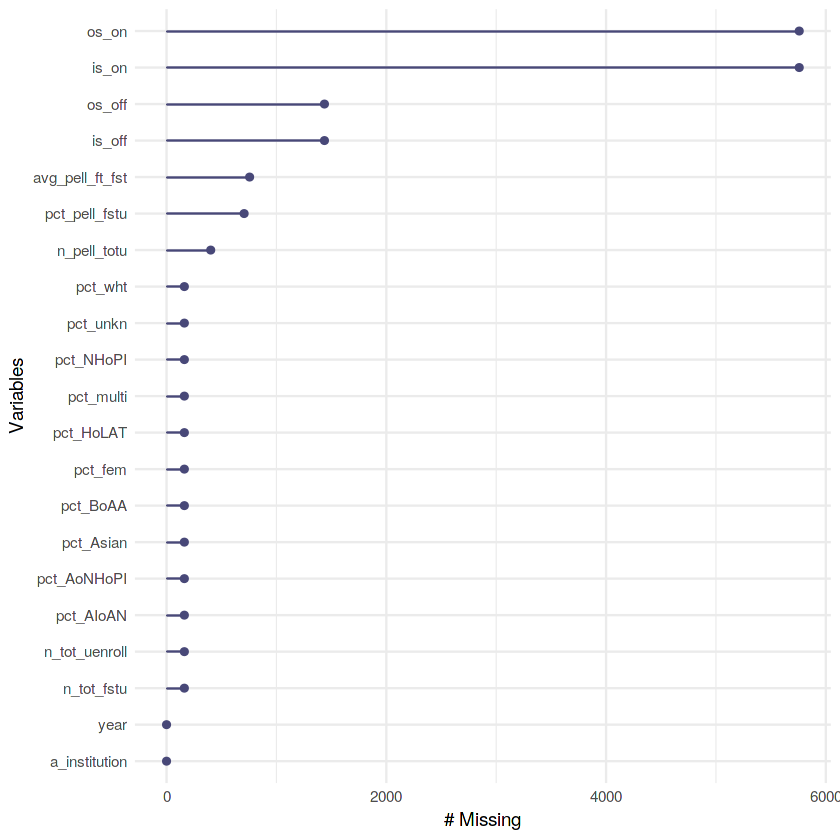

In [3]:
gg_miss_var(tui_clean) +
aes(main = "Initial Visual of Data Missingness")

# visual of the missing data in predictor set

tui_clean <- preProcess(
  x = tui_clean,
  method = c("medianImpute")
) %>% predict(tui_clean)

#summary(tui_clean) # yay, no more NAs

colSums(is.na(tui_reference))
tui_reference %<>% na.omit() #remove rows with NA in the outcome (1120 out of 14772)
colSums(is.na(tui_reference))

# create a reference table for school name to unit id match...
## need centered, scaled, numeric matrix for modeling.

#write.csv(tui_reference, file = "tuition_reference_table.csv")
#   - used this in RStudio, but not running here to save Kaggle-time


# must be numeric matrix
tui_clean %<>% select(-a_institution)
tui_mat <- as.matrix(tui_clean, rownames.force = NA)


tui_stnd <- preProcess(
  # Do not process the outcome variable
  x = tui_mat,
  # Standardize using methods: 'center' and 'scale'
  method = c("center", "scale")
) # We have to pass the 'preProcess' object to 'predict' to get new data
tui_stnd %<>% predict(newdata = tui_mat)

# Save preProcessed matrix as csv (in RStudio)
# write.csv(tui_stnd, file = "tuition_stnd_mat.csv")

## Format Data for Modeling 1

This modeling uses tuition rates and other school data to predict retention rates. No fixed effects here for school and no consideration of tuition change in past years.


Create splits for training & dev sets.

In [4]:
# Create SPLITS from above data processing for training vs dev error rate assessment
tui = read.csv("../input/524-tuition/tuition_stnd_mat.csv")
reference = read.csv("../input/524-tuition/tuition_reference_table.csv")


set.seed(0726)
split <- initial_split(tui, prop = 4/5)
tr = as.matrix(training(split))
te = as.matrix(testing(split))

# Save x and y separate for tr and te
x.tr = tr[,1:22]
y.tr = tr[,23]

x.te = te[,1:22]
y.te = te[,23]


## Modeling 1

### Elasticnet

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


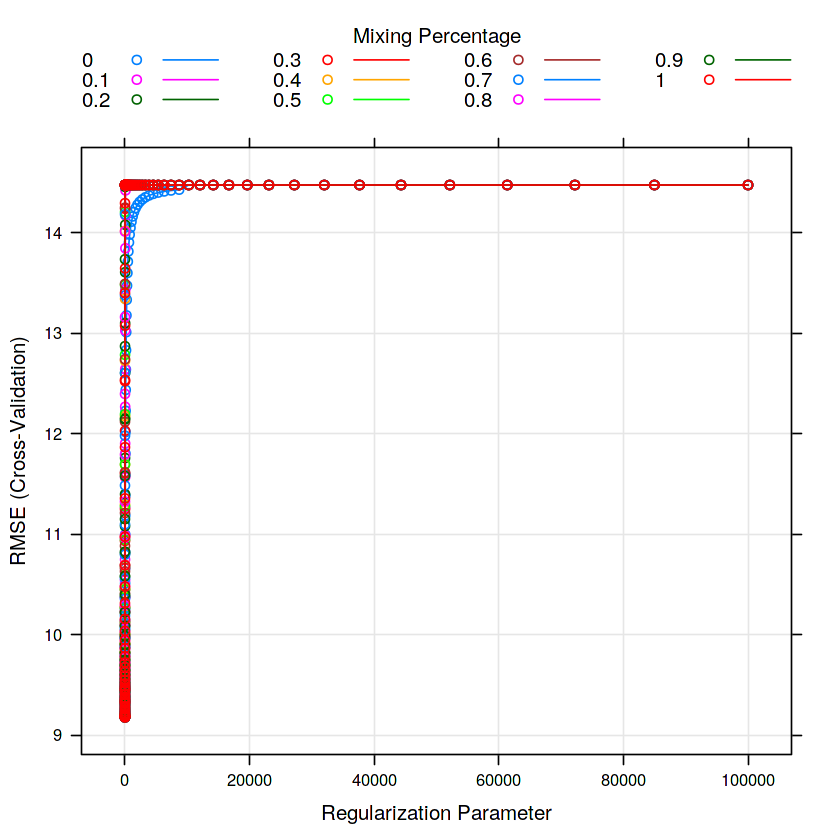

In [5]:
## Elasticnet 1 is using caret, by RA
## Elasticnet 1 - Train with cross validation

## Our range of λ
lambdas_net = 10^seq(from = 5, to = -2, length = 100)
## Our range of α
alphas = seq(from = 0, to = 1, by = 0.1)

# Training
net_cv = train(
  # The formula
  y = y.tr, # wants factor outcome for classification... but trying with numeric for this
  x = x.tr[,3:22], # omit X, id, and outcome columns
  # The dataset
  data = tr, # matrix
  # The 'glmnet' package does ridge and lasso
  method = "glmnet",
  # 5-fold cross validation
  trControl = trainControl("cv", number = 5),
  # The parameters of 'glmnet'
  tuneGrid = expand.grid(alpha = alphas, lambda = lambdas_net)
)
plot(net_cv)

## Elasticnet 1 - Fit final model
final_net =  glmnet(
  y = y.tr, # wants factor outcome for classification... but trying with numeric for this
  x = x.tr[,3:22], # omit X, id, and outcome columns
  standardize = T,
  alpha = net_cv[["bestTune"]][["alpha"]],
  lambda = net_cv[["bestTune"]][["lambda"]]
)



## Elasticnet 1 - Predictions
# Make elasticnet predictions with final fitted model & SAVE as vectors

# still using training data
pred_net_tr = predict(
  final_net,
  type = "response",
  s1 = net_cv[["bestTune"]][["lambda"]],
  s2 = net_cv[["bestTune"]][["alpha"]],
  # Our data
  newx = x.tr[,3:22] # matrix, omit X, id, & outcome columns
)

pred_net_tr2 <- predict(final_net, newx = tr[,3:22])

pred_net_te2 <- predict(final_net, newx = te[,3:22])

# onto test data
test_net = predict(
  final_net,
  type = "response",
  s1 = net_cv[["bestTune"]][["lambda"]],
  s2 = net_cv[["bestTune"]][["alpha"]],
  # Our data
  newx = te[,3:22], # matrix, omit X, id & outcome columns
)

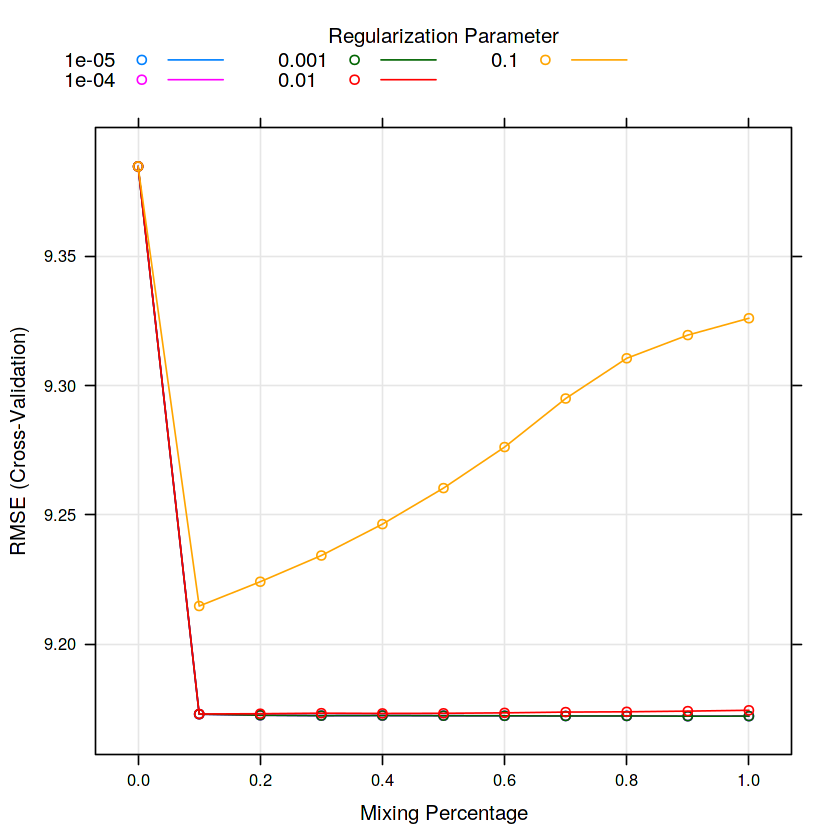

In [6]:
## Elasticnet 2, by NK
### Elasticnet 2 - Train with cross validation ----

##first model: logistic

model_glmnet = train(
   ft_ret_rate ~ .,
  data = tr[,3:23],
  method = "glmnet",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = expand.grid(
    alpha = seq(0, 1, 0.1),
    lambda = c(0.1, 0.01, 0.001, 0.0001, 0.00001))
)

plot(model_glmnet)


### Elasticnet 2 - Predictions ----
pred_net2_tr <- predict(model_glmnet, newdata = tr[,3:23])
pred_net2_te <- predict(model_glmnet, newdata = te[,3:23])

### Ridge

In [7]:
## Ridge 1 by RA

## Define range of Lambda for Ridge regression (decreasing range for glmnet)
lambdas_ridge = 10^seq(from = 5, to = -2, length = 100)


## Ridge 1 - Train w cross validation
ridge_cv = cv.glmnet(
  x = x.tr,
  y = y.tr,
  alpha = 0, # 0 for ridge (1 for lasso)
  standardize = T,
  lambda = lambdas_ridge,
  # New: How we make decisions and number of folds
  type.measure = "mse",
  nfolds = 5
)

## Ridge 1 - Fit final model 
final_ridge =  glmnet(
  x = x.tr,
  y = y.tr,
  standardize = T,
  alpha = 0,  # 0 for ridge (1 for lasso)
  lambda = ridge_cv$lambda.min
)

## Ridge 1 - Make ridge predictions & save as vectors 

# still using training data
pred_ridge_te = predict(
  final_ridge,
  type = "response",
  # Our chosen lambda
  s = ridge_cv$lambda.min,
  # Our data
  newx = x.te
)

# onto test data
test_ridge = predict(
  final_ridge,
  type = "response",
  # Our chosen lambda
  s = ridge_cv$lambda.min,
  # Our data
  newx = x.te
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


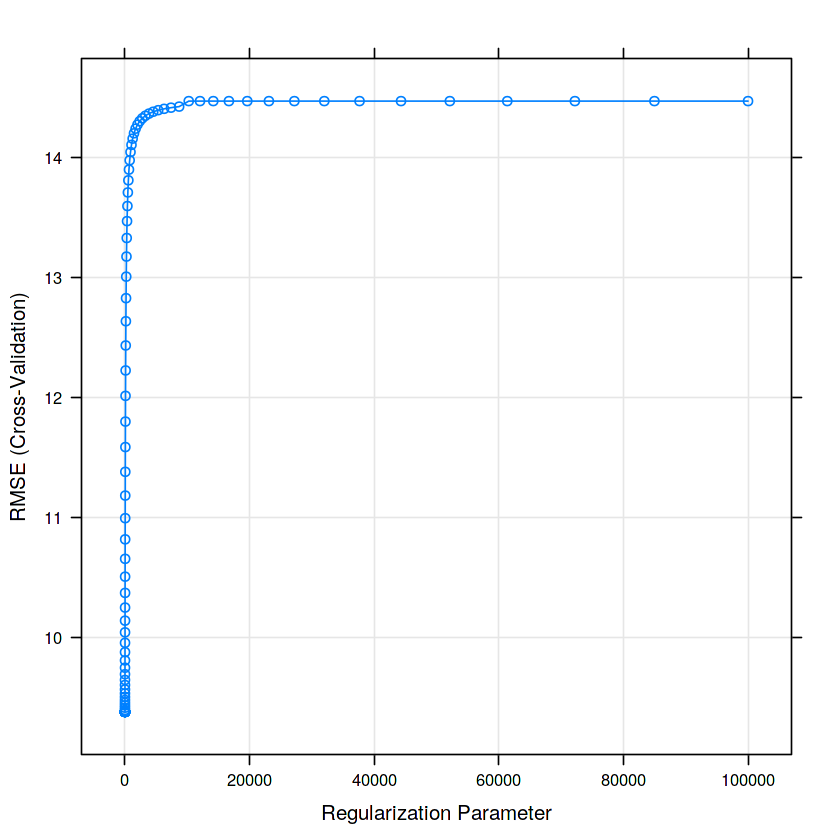

In [8]:
# Ridge 2 by NK
# Ridge 2 - Train w cross validation -------

model_ridge = train(
  ft_ret_rate ~ .,
  data = tr[,3:23],
  method = "glmnet",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = expand.grid(
    alpha = 0,
    lambda = lambdas_ridge
  ))
plot(model_ridge)


## Ridge 2 - Predictions ------
pred_ridge2_tr <- predict(model_ridge, newdata = tr[,3:23])
pred_ridge2_te <- predict(model_ridge, newdata = te[,3:23])

### Lasso

In [9]:
## Define range of Lambda for Lasso regression (decreasing range for glmnet)

lambdas_lasso = 10^seq(from = 5, to = -2, length = 100)

# Lasso 1, by Rebecca
## Lasso 1 - Train w cross validation -----------------
lasso_cv = cv.glmnet(
  x = x.tr[,3:22],
  y = y.tr,
  alpha = 1, # 1 for lasso (0 for ridge)
  standardize = T,
  lambda = lambdas_lasso,
  # New: How we make decisions and number of folds
  type.measure = "mse",
  nfolds = 5
)

## Lasso 1 - Fit final model 
final_lasso =  glmnet(
  x = x.tr[,3:22],
  y = y.tr,
  standardize = T,
  alpha = 0,  # 1 for lasso (0 for ridge)
  lambda = lasso_cv$lambda.min
)

## Lasso 1 - Predict & save as vectors 

# still using training data
pred_lasso = predict(
  final_lasso,
  type = "response",
  # Our chosen lambda
  s = lasso_cv$lambda.min,
  # Our data
  newx = x.tr[,3:22]
)


# onto test data
test_lasso = predict(
  final_lasso,
  type = "response",
  # Our chosen lambda
  s = lasso_cv$lambda.min,
  # Our data
  newx = x.te[,3:22]
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


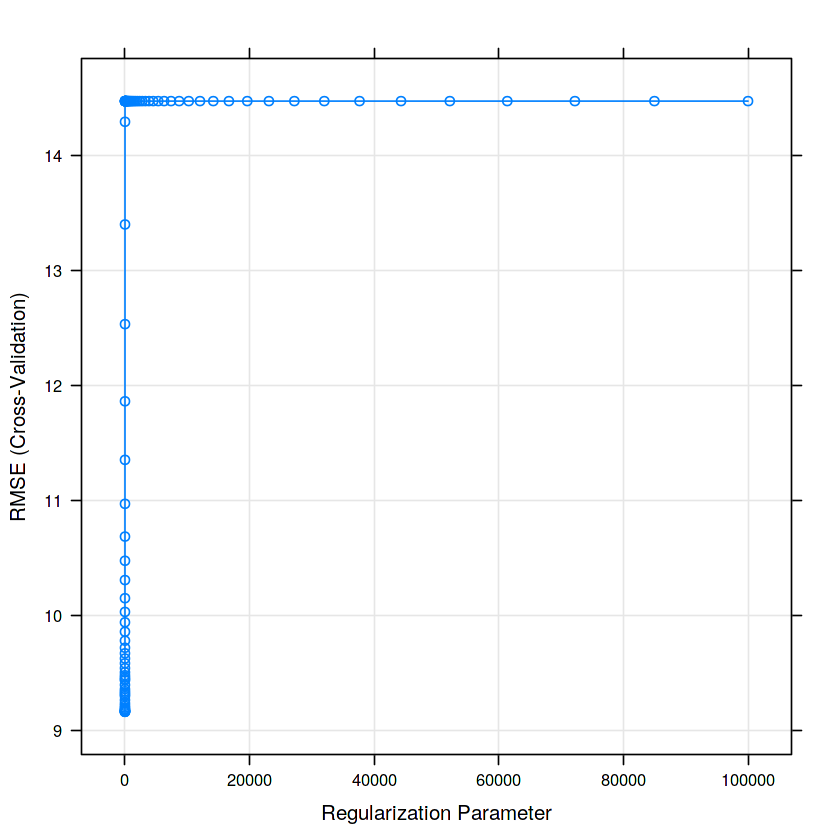

In [10]:
# Lasso 2, by Nina
# Lasso 2 - Train 

model_lasso = train(
  ft_ret_rate ~ .,
  data = tr[,3:23],
  method = "glmnet",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = expand.grid(
    alpha = 1,
    lambda = lambdas_lasso
  ))
plot(model_lasso)

# Lasso 2 - Predict -----

pred_lasso2_tr <- predict(model_lasso, newdata = tr[,3:22])
pred_lasso2_te <- predict(model_lasso, newdata = te[,3:22])

### KNN
KNN by Nina

k-Nearest Neighbors 

10922 samples
   20 predictor

Pre-processing: centered (20), scaled (20) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 8737, 8738, 8737, 8738, 8738 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  7.816261  0.7090084  5.193244
   7  7.904161  0.7023898  5.299376
   9  7.942005  0.6999414  5.373691
  11  8.017755  0.6944935  5.446386
  13  8.075838  0.6903213  5.501512

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 5.

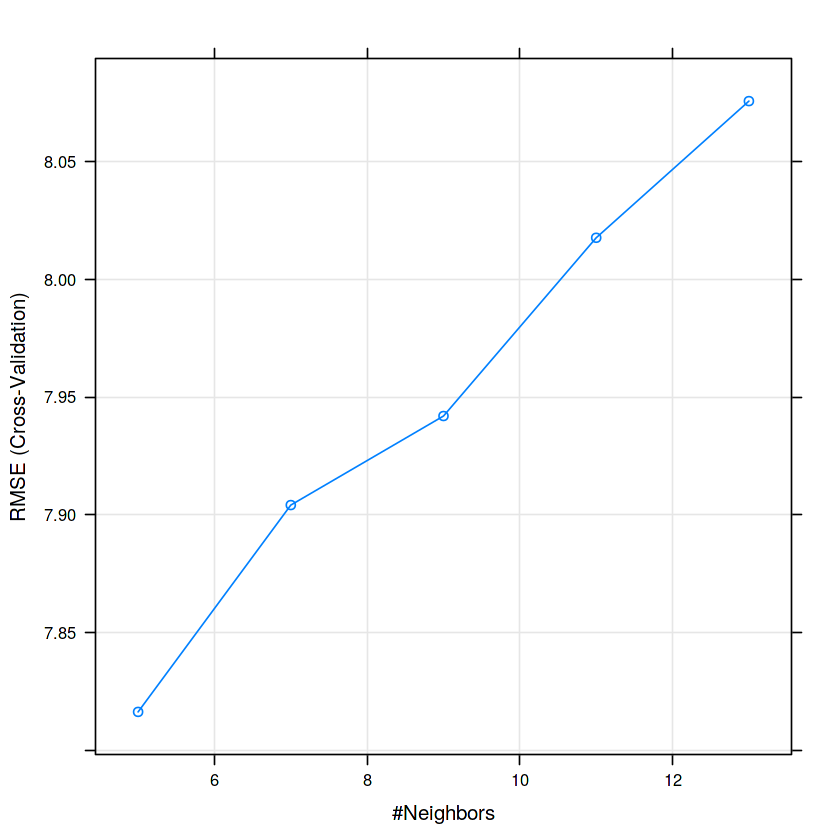

In [11]:
# KNN - Train 
model_knn <- train(
  ft_ret_rate ~., 
  data = tr[,3:23], 
  method = "knn",
  trControl = trainControl("cv", number = 5),
  preProcess = c("center","scale"),
  tuneLength = 5
)
model_knn
plot(model_knn)



# KNN - Predict 

pred_knn_tr <- predict(model_knn, newdata = tr[,3:22])
pred_knn_te <- predict(model_knn, newdata = te[,3:22])

# Modeling 2

## Format Data for Modeling 2
Data - Load & Format for 2nd modeling round with fixed effect for school and use of value difference in tuition over 1 and 2 year increments.

Modeling 2 by RA.

In [12]:
tui = read.csv("../input/524-tuition/tuition_stnd_mat2.csv")

drops1 = c("pct.incr_pell.represent.1yr", "pct.incr.pell.represent.2yr",
          "pct.incr.is.on.1yr", "pct.incr.is.on.2yr", "pct.incr.os.on.1yr", "pct.incr.os.on.2yr",
          "pct.incr.ret.1yr", "pct.incr.ret.2yr")
tui  <- tui[, !(names(tui) %in% drops1)]

colSums(is.na(tui))
#tui %<>% na.omit()

# after confirming no NA are in outcome variable:
# using knnImpute to resolve remaining NA
tui = preProcess(
  x = tui[,4:38],
  method = c("knnImpute")
)                            %>% predict(tui)

reference = read.csv("../input/524-tuition/tuition_referenc2_table.csv")

colSums(is.na(reference))
reference = cbind.data.frame(reference, tui$ft_ret_rate)



# Create SPLITS for training vs testing
set.seed(0726)
split = initial_split(tui, prop = 4/5)
tr = as.matrix(training(split))
te = as.matrix(testing(split))

# Save x and y separate for tr and te
x.tr = tr[,2:38]
y.tr = tr[,39]

x.te = te[,2:38]
y.te = te[,39]


X                  a_unit_id 
                         0                          0 
                      year                n_pell_totu 
                         0                          0 
             pct_pell_fstu            avg_pell_ft_fst 
                         0                          0 
                     is_on                      os_on 
                         0                          0 
                    is_off                     os_off 
                         0                          0 
             n_tot_uenroll                 n_tot_fstu 
                         0                          0 
                 pct_AIoAN                pct_AoNHoPI 
                         0                          0 
                 pct_Asian                  pct_NHoPI 
                         0                          0 
                  pct_BoAA                  pct_HoLAT 
                         0                          0 
                   pct_wht                   pct_unkn 
                         0                          0 
                 pct_multi                    pct_fem 
                         0                          0 
incr.in.pell.represent.1yr incr.in.pell.represent.2yr 
                       307                        307 
           incr.is.off.1yr        pct.incr.is.off.1yr 
                       307                        307 
           incr.is.off.2yr        pct.incr.is.off.2yr 
                       307                        307 
            incr.is.on.1yr             incr.is.on.2yr 
                       307                        307 
           incr.os.off.1yr        pct.incr.os.off.1yr 
                       307                        307 
           incr.os.off.2yr        pct.incr.os.off.2yr 
                       307                        307 
            incr.os.on.1yr             incr.os.on.2yr 
                       307                        307 
        incr.retention.1yr         incr.retention.2yr 
                       307                        307 
               ft_ret_rate 
                         0

X        a_unit_id    a_institution             year 
               0                0                0                0 
tuition.dd...46. 
             307

## Change over time models


Eclasticnet model & predictions:

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


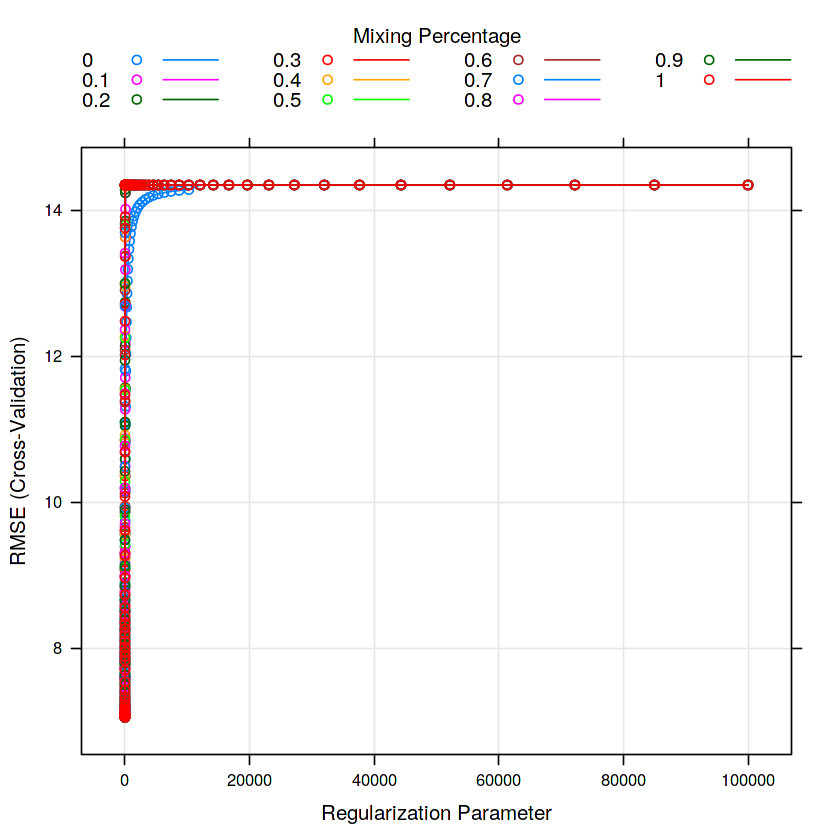

In [13]:
## Our range of λ
lambdas_net = 10^seq(from = 5, to = -2, length = 100)
## Our range of α
alphas = seq(from = 0, to = 1, by = 0.1)

#Train with cross validation 
##first model: logistic

model_glmnet = train(
  ft_ret_rate ~ .,
  data = tr[,2:39],
  method = "glmnet",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = expand.grid(
    alpha = seq(from = 0, to = 1, by = 0.1),
    lambda = 10^seq(from = 5, to = -2, length = 100)))


plot(model_glmnet)


#Elasticnet ch Predictions
net.ch_tr <- predict(model_glmnet, newdata = tr[,2:38])
net.ch_te <- predict(model_glmnet, newdata = te[,2:38])



Ridge model & predictions:

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


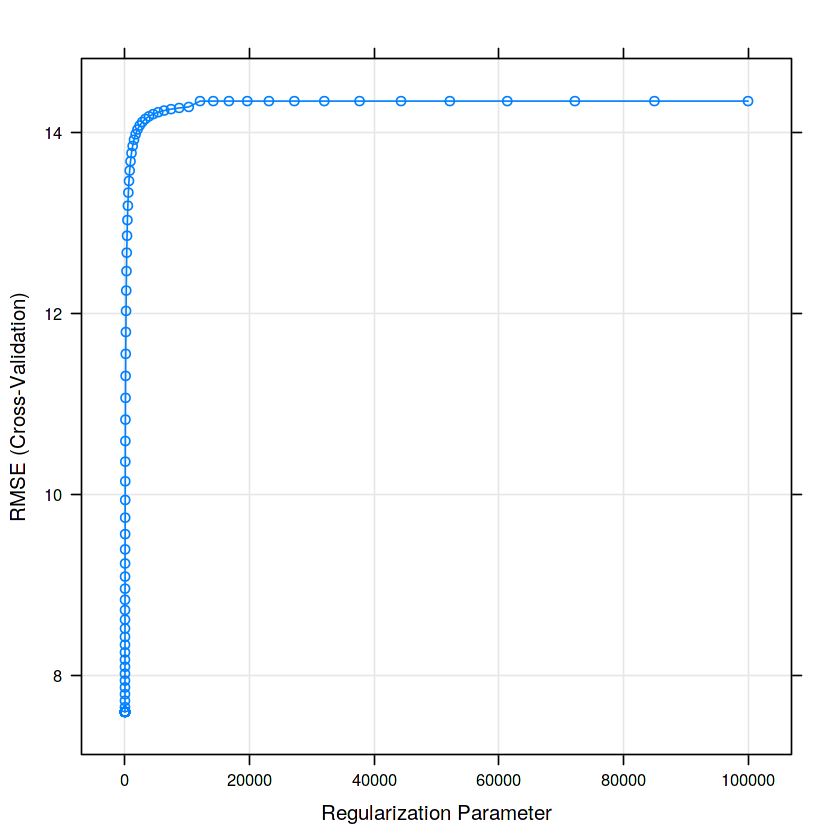

In [14]:
# Ridge - Train w cross validation

model_ridge = train(
  ft_ret_rate ~ .,
  data = tr[,2:39],
  method = "glmnet",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = expand.grid(
    alpha = 0,
    lambda = 10^seq(from = 5, to = -2, length = 100)
  ))

plot(model_ridge)


## Ridge - Predictions
ridge.ch_tr <- predict(model_ridge, newdata = tr[,2:38])
ridge.ch_te <- predict(model_ridge, newdata = te[,2:38])

Lasso model & predictions:

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


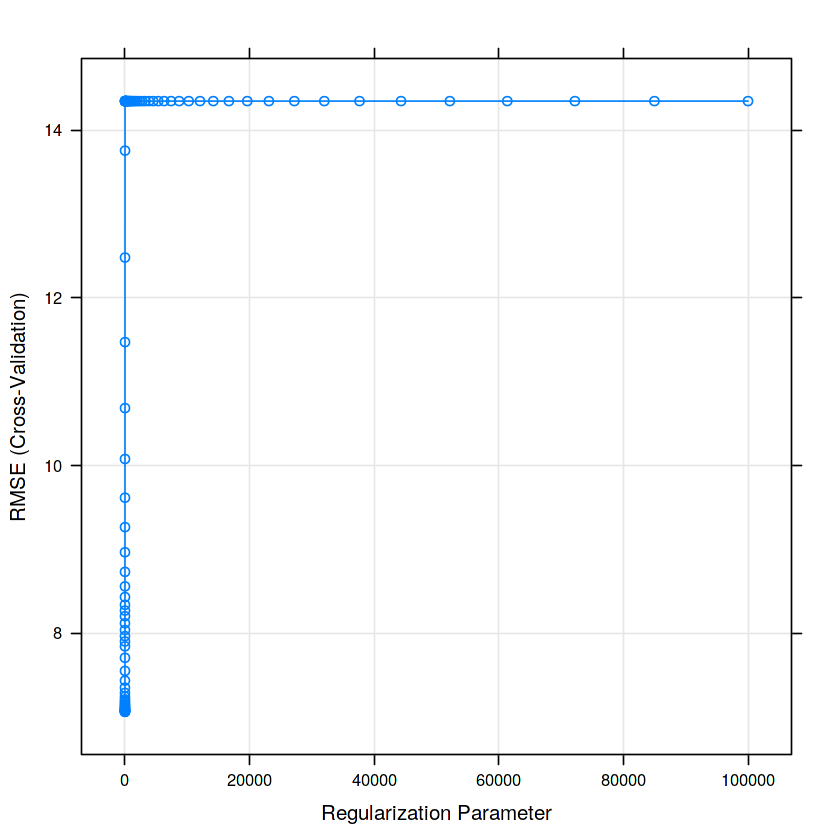

In [15]:
#Lasso - Train with cross-validation
model_lasso = train(
  ft_ret_rate ~ .,
  data = tr[,2:39],
  method = "glmnet",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = expand.grid(
    alpha = 1,
    lambda = 10^seq(from = 5, to = -2, length = 100)
  ))

plot(model_lasso)

# Lasso 2 - Predict
lasso.ch_tr <- predict(model_lasso, newdata = tr[,2:38])
lasso.ch_te <- predict(model_lasso, newdata = te[,2:38])

KNN model & predictions

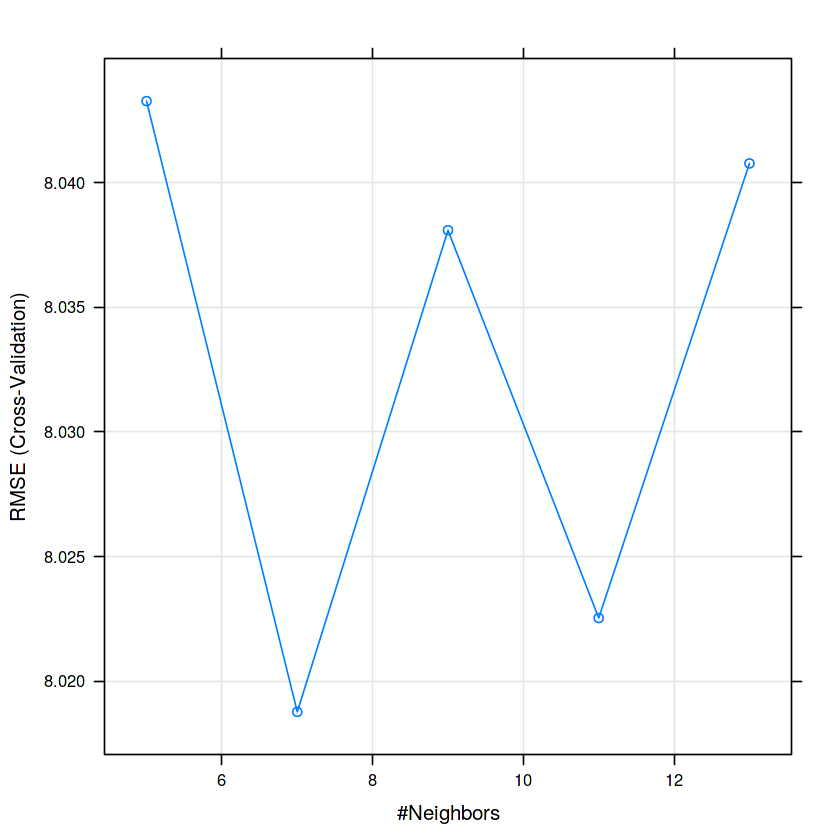

In [16]:
# KNN - Train with cross validation
model_knn <- train(
  ft_ret_rate ~., 
  data = tr[,2:39], 
  method = "knn",
  trControl = trainControl("cv", number = 5),
  preProcess = c("center","scale"),
  tuneLength = 5
)

plot(model_knn)


# KNN - Predictions
knn.ch_tr <- predict(model_knn, newdata = tr[,2:38])
knn.ch_te <- predict(model_knn, newdata = te[,2:38])

# Model Assessment 2

Model,RMSE,R2,MAE
<fct>,<dbl>,<dbl>,<dbl>
elnet,9.413262,0.6091184,6.606132
elnet2,9.409802,0.6093231,6.603288
ridge,9.380323,0.6118843,6.592092
ridge2,9.670667,0.5896175,6.827065
lasso,9.412329,0.6091774,6.605362
lasso2,9.415901,0.6089730,6.607580
knn,7.922387,0.7232106,5.110281
enet.ch,7.390286,0.7392736,4.395918
ridge.ch,7.655797,0.7221241,5.096030


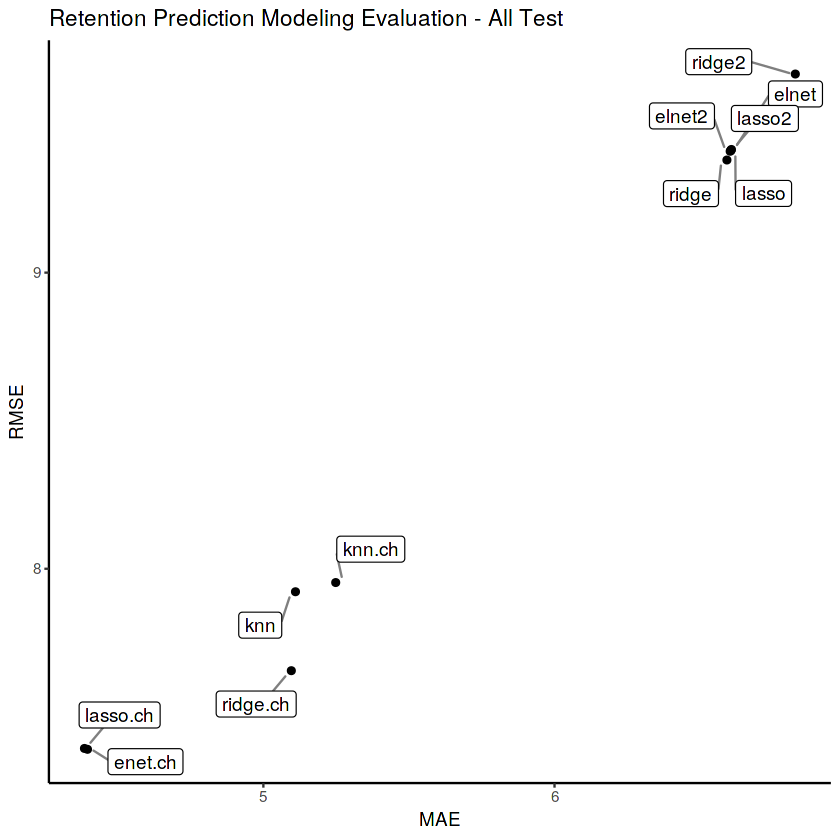

In [17]:
# Model Assessment - START HERE ------
# collect data to evaluate training and test error rates
# training error evaluation compilation
# in yardstick and wants factor outcome: accuracy_vec(y.te, pred_knn_te)
library(magrittr)
y.te %<>% as.data.frame()

id.tr = tr[,1:3]
truth.tr = tr[,39]

id.te = te[,1:3]
truth.te = te[,39] 
 

tr_eval = cbind.data.frame(id.tr, truth.tr, net.ch_tr,
                           ridge.ch_tr,
                           lasso.ch_tr, knn.ch_tr)




te_eval = cbind.data.frame(id.te, truth.te, net.ch_te,
                           ridge.ch_te,
                           lasso.ch_te, knn.ch_te)

L1.net = MAE(truth.te, net.ch_te)

L1.rid = MAE(truth.te, ridge.ch_te)

L1.las = MAE(truth.te, lasso.ch_te)

L1.knn = MAE(truth.te, knn.ch_te)

## Test error metrics -----
a.net = postResample(pred = net.ch_te, obs = truth.te)

a.rid = postResample(pred = ridge.ch_te, obs = truth.te)

a.las = postResample(pred = lasso.ch_te, obs = truth.te)

a.knn = postResample(pred = knn.ch_te, obs = truth.te)

tr.net = postResample(pred = net.ch_tr, obs = truth.tr)

tr.rid2 = postResample(pred = ridge.ch_tr, obs = truth.tr)

tr.las2 = postResample(pred = lasso.ch_tr, obs = truth.tr)

tr.knn = postResample(pred = knn.ch_tr, obs = truth.tr)

p_load(magrittr)
my.metric = rbind.data.frame(a.net, a.rid,
                             a.las, a.knn)

errors = c("RMSE", "R2", "MAE")
colnames(my.metric) <- errors

Model = c("enet.ch", "ridge.ch", "lasso.ch", "knn.ch")

my.metrics = cbind(Model, my.metric)

write.csv(my.metrics, file = "team_results_table3.csv")

toplot = read.csv("../input/524-tuition/team_results_table_all_te.csv")


#combine all eval metrics
team_results1 = read.csv("../input/524-tuition/team_results_table.csv")

team_results_all = rbind(team_results1[,2:5], my.metrics)
write.csv(team_results_all, file = "team_results_table_all.csv")


## plot ----

p_load(ggrepel)

p.1 <- ggplot(team_results_all,
              aes(x = MAE, y = RMSE)) +
  geom_point()+
  xlab("MAE")+
  ylab("RMSE")+
  ggtitle("Retention Prediction Modeling Evaluation - All")+ 
  geom_label_repel(aes(label = Model),
                   box.padding   = 0.35, 
                   point.padding = 0.5,
                   segment.color = 'grey50') +
  theme_classic()

#p.1



p.2 <- ggplot(toplot,
              aes(x = MAE, y = RMSE )) +
  geom_point()+
  xlab("MAE")+
  ylab("RMSE")+
  ggtitle("Retention Prediction Modeling Evaluation - All Test")+ 
  geom_label_repel(aes(label = Model),
                   box.padding   = 0.35, 
                   point.padding = 0.5,
                   segment.color = 'grey50') +
  theme_classic()


toplot

p.2